In [1]:
#Zeeman Lab project with Emelie
bohrMag = 9.27 * 10**(-24)
hbar = 1.05 * 10**(-34) #(SI)
class Zeeman(): #Here we introduce a class 
  def __init__(self, n,l,s,j, T=0.5):
    if j<0: #since we mostly care about j we only restrict for itself, while obviously s,l are important for defining it
      print("No negative values.")
    else:
      self.n = n
      self.l = l 
      self.s = s 
      self.j = j
      self.T = T
  def g(self): #Landé g
    if self.j == 0:
      return print("No splitting")
    else:
      return 3/2 + (self.s*(self.s + 1) - self.l*(self.l + 1))/(2*self.j*(self.j + 1))

  def mj(self): #mj calculator
    return [i for i in range(-self.j,self.j+1)]
  def energy(self): #energy calculator, returns in order of mj
    Ene = [self.T*Zeeman.g(self)*bohrMag*i for i in Zeeman.mj(self)]
    for i in Zeeman.mj(self):
       print("M_j level:"), print("{}".format(i))

  def img(self,other):
    if other.j == 0:
      return ("False values.")
    if self.j == 0:
      return print("sigma-, pi, sigma+"), [abs(g(other))], [0], [-abs(g(other))]
    else:
      range = abs(Zeeman.g(other))
      mesh = Zeeman.deltag(self,other)
      change = int(np.floor(2*range/mesh + 1))
      grid = np.zeros(change)
      for i in range(change):
        grid[i] = range - mesh*i
      mj1 = Zeeman.mj(self)
      mj2 = Zeeman.mj(other)
      sp=0
      sm=0
      pi=0
      for i in mj1:
        for k in mj2:
          if i+1 ==k:
            sp+=1
          if i-1 == k:
            sm+=1
          if i == k:
            pi+=1
      spL = []
      piPL = []
      smL = []
      piL = []
      for i in range(0,sp):
        spL.append(grid[i])
        sm.append(grid[(len(grid)-i - 1)])
      for j in range(-(pi-1)/2,(pi-1)/2 + 1):
        piL.append(mesh*i)
      for k in range (len(piL)):
        for l in range(len(spL)):
          if piL[k] == spL[l]:
            spL[:l]
            smL[:l]
      return spl, piL, smL
    
p1 = Zeeman(1,0,1,1)
p2 = Zeeman(12,1,1,2)

p2.energy()
  

M_j level:
-2
M_j level:
-1
M_j level:
0
M_j level:
1
M_j level:
2


In [2]:
m = 9.274*10**(-24)/(1.986*10**(-23))
print(m)

0.46696878147029197


In [3]:
def deltasig(D_a, D_b, D_1=7261, D_2=17514):
  d = 0.3 #unit (cm)
  return 1/(2*d)*(D_a**2 - D_b**2)/(D_1**2 - D_2**2)
RedParaD_aList = [7477,7991, 7765,8162,8124,8290,8174,8355]
RedParaD_bList = [6512,6661, 6511,6295,6215,6038,5862,5583]
CurrRPara = [1.5,1.8,2.1, 2.4,2.8,3.1,3.4,4.0]
initR = [7261, 17514]
RedPerpD_aList = []
RedPerpD_bList = []
CurrRPerp = []

Blue_aList = [11061,11169,11314,11441,11466, 11555,11656,11826]
Blue_bList = [9766, 9871,9894,9722,9581, 9458,9219,9327]
CurrB = [1.5,2.1,2.5,2.8,3.1,3.4,3.8,4.0]
initB = [10658, 16939]




1.0019213685347017 0.001965075290765339
1.7332937542536484 0.04878256821151922


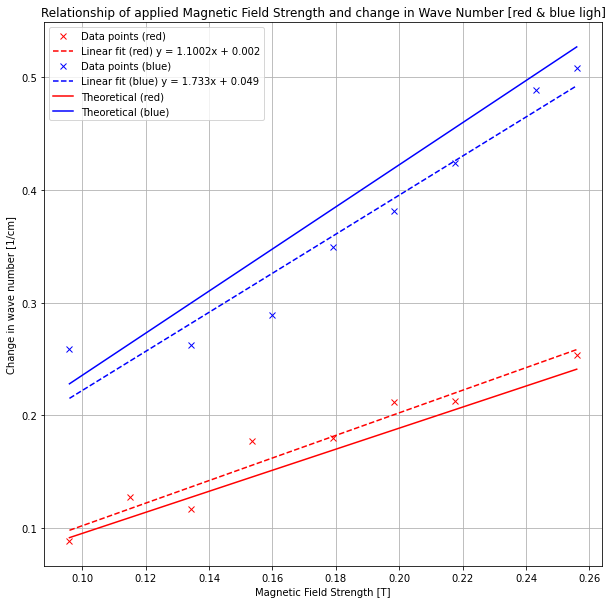

Magnetic field: 0.064
Red: 1.0727926665462142
Blue: 1.8558989626632232


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
IB = 0.064 #Current-magnetic field has this proportional constant
x = np.array([IB*j for j in CurrRPara]).reshape((-1,1)) #here we wish to insert our magnetic field strength
y = np.array([deltasig(RedParaD_aList[k], RedParaD_bList[k], initR[1],initR[0]) for k in range(len(RedParaD_aList))]) #here we wish to insert our deltasig
mode = LinearRegression()
mode.fit(x,y)
mode = LinearRegression().fit(x,y)

z = np.array([IB*j for j in CurrB]).reshape((-1,1)) #here we wish to insert our magnetic field strength
q = np.array([deltasig(Blue_aList[k], Blue_bList[k], initB[1],initB[0]) for k in range(len(Blue_aList))]) #here we wish to insert our deltasig
model = LinearRegression()
model.fit(z,q)
model = LinearRegression().fit(z,q)


def linearregR(x):
  return mode.coef_ * x + mode.intercept_


def linearregB(x):
  return model.coef_ * x + model.intercept_

def theoR(x):
  return m*2*x + mode.intercept_
def theoB(x):
  return m*4*x + model.intercept_


fig = plt.figure(figsize=(10,10))
plt.plot(x,y, "x", color ="red")
plt.plot(x, linearregR(x), "--", color = "red")
plt.plot(z,q, "x", color= "blue")
plt.plot(z, linearregB(z), "--", color = "blue")
plt.plot(x, theoR(x), color = "red")
plt.plot(z, theoB(z), color = "blue")
print(mode.coef_[0], mode.intercept_)
print(model.coef_[0], model.intercept_)
plt.legend(["Data points (red)", "Linear fit (red) y = 1.1002x + 0.002", "Data points (blue)",
            "Linear fit (blue) y = 1.733x + 0.049", "Theoretical (red)", "Theoretical (blue)"])
plt.title("Relationship of applied Magnetic Field Strength and change in Wave Number [red & blue ligh]")
plt.xlabel("Magnetic Field Strength [T]")
plt.ylabel("Change in wave number [1/cm]")
plt.grid()
plt.show()


print("Magnetic field:", IB )
print("Red:", mode.coef_[0]/(2*m))
print("Blue:", model.coef_[0]/(2*m))

In [ ]:
IB = 0.056
for i in range(-1000,100000):
  IB+=0.000001
  x = np.array([IB*j for j in CurrRPara]).reshape((-1,1)) 
  y = np.array([deltasig(RedParaD_aList[k], RedParaD_bList[k], 17514,7261) for k in range(len(RedParaD_aList))]) 
  mode = LinearRegression()
  mode.fit(x,y)
  mode = LinearRegression().fit(x,y)
  z = np.array([IB*j for j in CurrB]).reshape((-1,1)) 
  q = np.array([deltasig(Blue_aList[k], Blue_bList[k], initB[1],initB[0]) for k in range(len(Blue_aList))]) 
  model = LinearRegression()
  model.fit(z,q)
  model = LinearRegression().fit(z,q)
  if abs(mode.coef_[0]/(2*m) - 1)<0.1:
    if abs(model.coef_[0]/(2*m) - 2)<0.1:
      break
  if IB>0.2:
    break 
print("Magnetic field:", IB )
print("Red:", mode.coef_[0]/(2*m))
print("Blue:", model.coef_[0]/(2*m))

Magnetic field: 0.06241800000000642
Red: 1.099982868066113
Blue: 1.9029371913620121
